Text(0.5,1,'$q_{1}$')

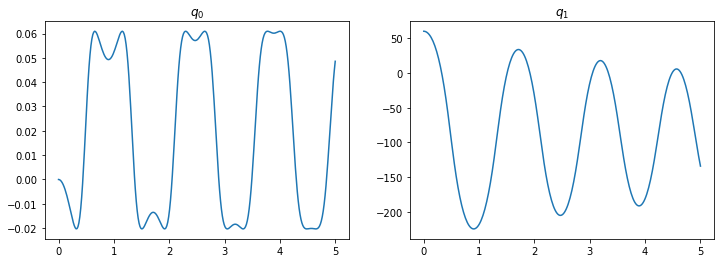

In [7]:
#IMPORTS
from eq_of_motion import *

import numpy as np
from numpy import deg2rad, rad2deg
from scipy.integrate import odeint
from pydy.codegen.ode_function_generators import generate_ode_function
from sympy.physics.vector import init_vprinting, vlatex
init_vprinting(use_latex='mathjax', pretty_print=False)

from matplotlib import pyplot as plt



#Constants
Constants = [l, a[0], m[0], m[1], J[0], J[1], d[0], g]

#generating ode functions :
right_hand_side = generate_ode_function(
    forcing_vector, q, qdot, Constants, mass_matrix=mass_matrix, specifieds=[f])


#defining numerical constans :
numerical_constans = np.array([
    0.32,  # l0
    0.2,  #a0
    3.34,  #m0
    0.8512,  #m1
    0,  #J0
    0.01980,  #J1
    0.00715,  #d
    9.81  #g
])

#
numerical_specified = np.array([0])

#integrating the Eq. of Motion
x0 = np.array([0, np.pi/3, 0, 0])
right_hand_side(x0, 0.0, numerical_specified, numerical_constans)



#integrating the Eq. of Motion
frames_per_sec= 60
final_time= 5
t=np.linspace(0.0, final_time, final_time*frames_per_sec)
sol = odeint(
    right_hand_side, x0, t, args=(numerical_specified, numerical_constans))


#ploting the results


fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[1].plot(t, rad2deg(sol[:,1]))
axes[0].plot(t, sol[:, 0])
axes[0].set_title("${}$".format(vlatex(q[0])))
axes[1].set_title("${}$".format(vlatex(q[1])))
#plt.show()

In [8]:
sol

array([[ 0.00000000e+00,  1.04719755e+00,  0.00000000e+00,
         0.00000000e+00],
       [-8.43207646e-05,  1.04479882e+00, -1.00796116e-02,
        -2.86941348e-01],
       [-3.36898637e-04,  1.03759342e+00, -2.01209591e-02,
        -5.75214605e-01],
       ...,
       [ 4.04925415e-02, -2.09082337e+00,  2.77531257e-01,
        -7.87346699e+00],
       [ 4.48406599e-02, -2.21924597e+00,  2.42055682e-01,
        -7.47690892e+00],
       [ 4.85802563e-02, -2.34063290e+00,  2.05165097e-01,
        -7.03462382e+00]])